# We need to build a model to determine the attrition of an employee in an organisation:

In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import re

In [161]:
data=pd.read_csv('employees_attrition.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [162]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

- **There are 8 categorical cols.**
- **27 cols are numerical.**

## 1. Data exploration and data cleaning:

a. understand the data and get some interesting visuals

b. check null values

c. Encode string categorical columns

d. check the correlation of the numerical columns through heatmap

In [163]:
data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

- **There are no null values present in the data.**

In [164]:
data.describe(include='object')

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470
unique,3,3,6,2,9,3,1,2
top,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1043,961,606,882,326,673,1470,1054


- Travlling due to business is not much.
- Mostly job is in R&D and qualification required is Life Sciences mostly.
- For Gender - Male is more in count.
- All the employees are over 18 years old.
- Most of the jobs are related to sales.
- Most of the employees are married.
- 70% of the job role does not require overtime.

In [165]:
data.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


- **Most of the employees spent 9 years at the organisation.**

In [166]:
print('Min age:',data.Age.min())
print('Max age:',data.Age.max())

# Most of the employees are 43 years old. 

Min age: 18
Max age: 60


C:\Users\HP\AnacondaJupyter\Anaconda_New\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


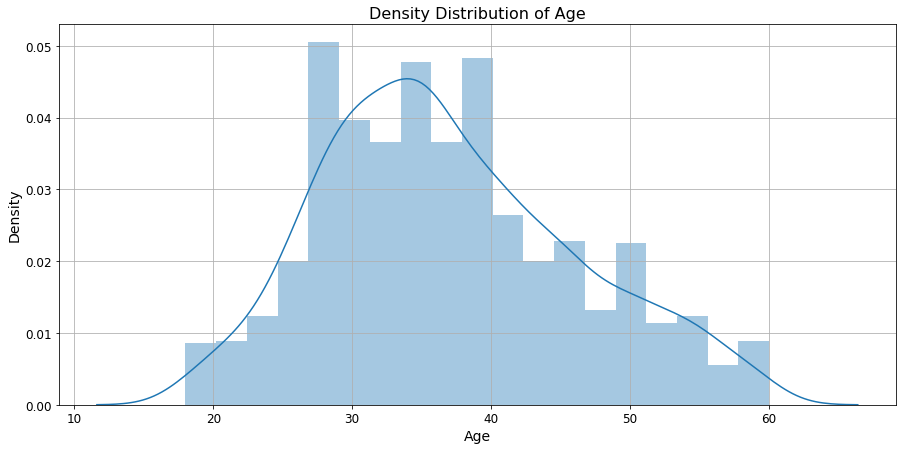

In [167]:
import seaborn as sns

fig = plt.figure(figsize=(15, 7))

sns.distplot(a=data['Age'], kde=True)

plt.title(label='Density Distribution of Age', size=16)
plt.xlabel(xlabel='Age', size=14)
plt.ylabel(ylabel='Density', size=14)
plt.xticks(size=12)
plt.yticks(size=12)
plt.grid(b=True)
plt.show()

In [ ]:
def kde(column):
    import seaborn as sns
    fig = plt.figure(figsize=(15, 7))
    sns.distplot(a=df[column], kde=True)

    plt.title(label='Density Distribution of '+column, size=16)
    plt.xlabel(xlabel='Age', size=14)
    plt.ylabel(ylabel='Density', size=14)
    plt.xticks(size=12)
    plt.yticks(size=12)
    plt.grid(b=True)
    plt.show()

In [168]:
data.Attrition.unique()

# 0 - Employee does nto quit
# 1 - Employee quits

array([1, 0], dtype=int64)

In [169]:
data.Attrition.value_counts(normalize=True)*100

0    83.877551
1    16.122449
Name: Attrition, dtype: float64

Text(0.5, 1.0, '% of employee attrition')

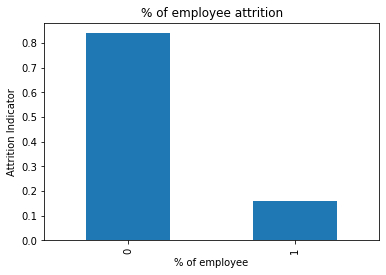

In [170]:
data.Attrition.value_counts(normalize=True).plot.bar()
plt.xlabel('% of employee')
plt.ylabel('Attrition Indicator')
plt.title('% of employee attrition')

In [171]:
data.BusinessTravel.unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [172]:
data.BusinessTravel.value_counts(normalize=True)*100

Travel_Rarely        70.952381
Travel_Frequently    18.843537
Non-Travel           10.204082
Name: BusinessTravel, dtype: float64

Text(0.5, 1.0, 'Business travel percentage')

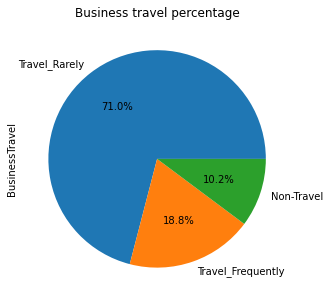

In [173]:
plt.figure(figsize=(9,5))
data.BusinessTravel.value_counts(normalize=True).plot.pie(autopct='%3.1f%%')
plt.title('Business travel percentage')

In [174]:
data.DailyRate.max()

1499

In [175]:
data.Department.unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [176]:
data.Department.value_counts() 

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

Text(0, 0.5, 'Count of employee')

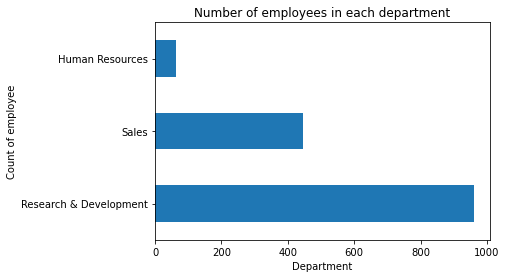

In [177]:
data.Department.value_counts().plot.barh()
plt.title('Number of employees in each department')
plt.xlabel('Department')
plt.ylabel('Count of employee')

In [178]:
data.JobRole.value_counts()   # Most of the jobs are related to sales.

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

Text(0, 0.5, 'Job roles')

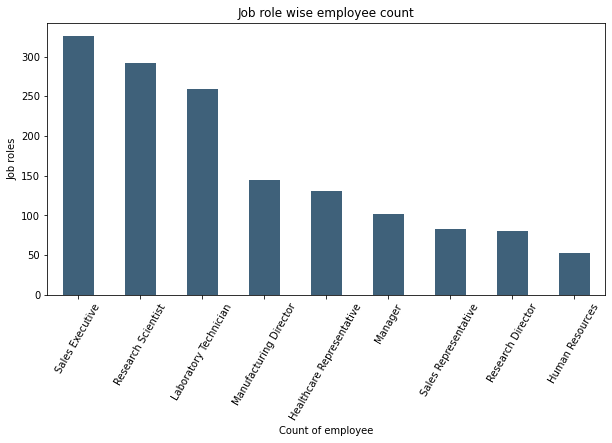

In [179]:
plt.figure(figsize=(10,5))
data.JobRole.value_counts().plot.bar(color='#3F617A')
plt.xticks(rotation=60)
plt.title('Job role wise employee count')
plt.xlabel('Count of employee')
plt.ylabel('Job roles')

In [180]:
data.MaritalStatus.value_counts()    # Most of the employees are married. 

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

Text(0.5, 1.0, 'Employee Marital Status')

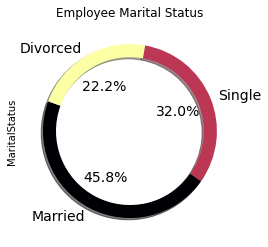

In [181]:
data.MaritalStatus.value_counts().plot(kind='pie',fontsize=14, autopct='%3.1f%%', wedgeprops=dict(width=0.15), shadow=True, startangle=160, cmap='inferno')
plt.title('Employee Marital Status')

In [182]:
data.OverTime.value_counts(normalize=True)*100

No     71.70068
Yes    28.29932
Name: OverTime, dtype: float64

Text(0.5, 1.0, 'count of employees doing overtime')

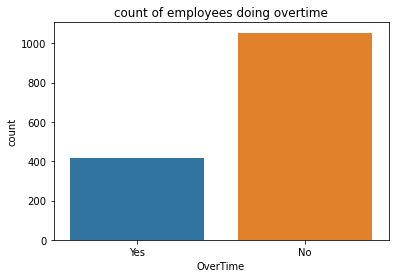

In [183]:
sns.countplot(x='OverTime', data=data)
plt.title('count of employees doing overtime')

In [184]:
# Assuming job satisfaction rates: (1 - Very bad / 2 - Bad / 3 - Average / 4 - Good)
round(data.JobSatisfaction.value_counts(normalize=True)*100)

4    31.0
3    30.0
1    20.0
2    19.0
Name: JobSatisfaction, dtype: float64

Text(0.5, 1.0, 'Employee Job Satisfaction in % based on rating(1 to 4)')

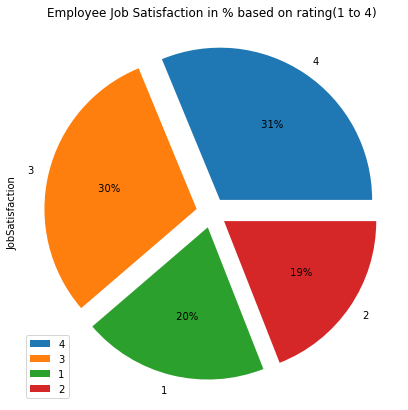

In [185]:
plt.figure(figsize=(15,7))
data.JobSatisfaction.value_counts(normalize=True).plot.pie(autopct='%3.0f%%',legend=True,explode=(0.1,0.1,0.1,0.1))
plt.title('Employee Job Satisfaction in % based on rating(1 to 4)')

- Overall near about 40% of the employees are not satisfied with their job.
- Overall 61% of the employee is satisfied with the job.

In [186]:
# Minimum & Maximum monthly income:  
print('Min Salary:',data.MonthlyIncome.min())
print('Max Salary:',data.MonthlyIncome.max())

Min Salary: 1009
Max Salary: 19999


Text(0, 0.5, 'Salary')

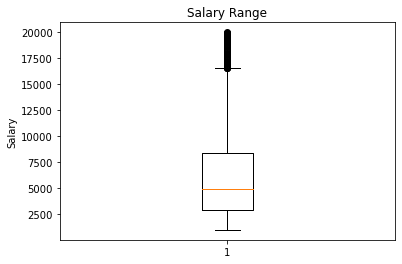

In [187]:
plt.boxplot(data.MonthlyIncome)
plt.title('Salary Range')
plt.ylabel('Salary')

In [188]:
# % of employees: 
round(data.NumCompaniesWorked.value_counts(normalize=True)*100)

1    35.0
0    13.0
3    11.0
2    10.0
4     9.0
7     5.0
6     5.0
5     4.0
9     4.0
8     3.0
Name: NumCompaniesWorked, dtype: float64

- 86% of the employees are pre-experience holders.

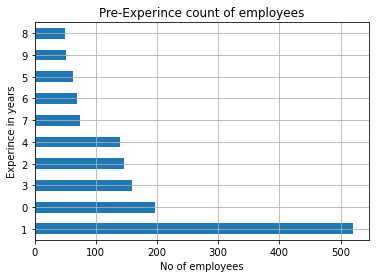

In [189]:
data.NumCompaniesWorked.value_counts().plot.barh()
plt.title('Pre-Experince count of employees')
plt.xlabel('No of employees')
plt.ylabel('Experince in years')
plt.grid()

In [190]:
# Hot encoding of categorical columns:
data_encoded=pd.get_dummies(data)
data_encoded.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1,1102,1,2,1,1,2,94,3,...,0,0,1,0,0,0,1,1,0,1
1,49,0,279,8,1,1,2,3,61,2,...,0,1,0,0,0,1,0,1,1,0
2,37,1,1373,2,2,1,4,4,92,2,...,0,0,0,0,0,0,1,1,0,1
3,33,0,1392,3,4,1,5,4,56,3,...,0,1,0,0,0,1,0,1,0,1
4,27,0,591,2,1,1,7,1,40,3,...,0,0,0,0,0,1,0,1,1,0


In [191]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 56 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   Attrition                          1470 non-null   int64
 2   DailyRate                          1470 non-null   int64
 3   DistanceFromHome                   1470 non-null   int64
 4   Education                          1470 non-null   int64
 5   EmployeeCount                      1470 non-null   int64
 6   EmployeeNumber                     1470 non-null   int64
 7   EnvironmentSatisfaction            1470 non-null   int64
 8   HourlyRate                         1470 non-null   int64
 9   JobInvolvement                     1470 non-null   int64
 10  JobLevel                           1470 non-null   int64
 11  JobSatisfaction                    1470 non-null   int64
 12  MonthlyIncome       

In [192]:
# All numerical columns:
numeric_features=data.select_dtypes(include=[np.number])
numeric_features.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1102,1,2,1,1,2,94,3,...,1,80,0,8,0,1,6,4,0,5
1,49,0,279,8,1,1,2,3,61,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,1373,2,2,1,4,4,92,2,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1392,3,4,1,5,4,56,3,...,3,80,0,8,3,3,8,7,3,0
4,27,0,591,2,1,1,7,1,40,3,...,4,80,1,6,3,3,2,2,2,2


In [193]:
# Correlation of numerical features:
numeric_features.corr()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,-0.056652,0.077924,-0.031373,NaN,-0.010577,-0.103369,-0.006846,-0.130016,...,-0.045872,NaN,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
DailyRate,0.010661,-0.056652,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,0.077924,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.010577,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,-0.103369,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,-0.006846,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,-0.130016,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976


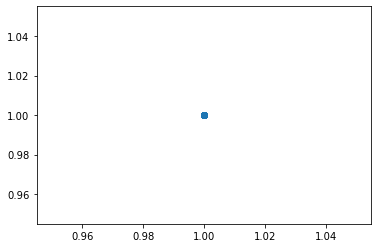

In [194]:
plt.scatter(data['EmployeeCount'],data['EmployeeCount'])

In [195]:
data.EmployeeCount.unique()

array([1], dtype=int64)

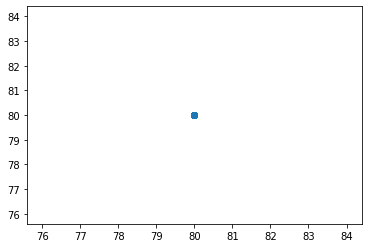

In [196]:
plt.scatter(data['StandardHours'],data['StandardHours'])

In [197]:
data.StandardHours.unique()

array([80], dtype=int64)

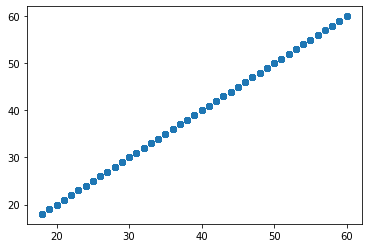

In [198]:
plt.scatter(data['Age'],data['Age'])

- **So, we can understand from the above analysis that there cannot be any correlation of a column which has a single value.**
- **So, we can drop this columns from the subset for further analysis of correlation.**

In [199]:
numeric_features_modified=numeric_features.drop(['StandardHours','EmployeeCount'],axis=1).copy()
numeric_features_modified.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1102,1,2,1,2,94,3,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,279,8,1,2,3,61,2,2,...,4,4,1,10,3,3,10,7,1,7
2,37,1,1373,2,2,4,4,92,2,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1392,3,4,5,4,56,3,1,...,3,3,0,8,3,3,8,7,3,0
4,27,0,591,2,1,7,1,40,3,1,...,3,4,1,6,3,3,2,2,2,2


In [200]:
numeric_features_modified.corr()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.010661,-0.001686,0.208034,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,-0.056652,0.077924,-0.031373,-0.010577,-0.103369,-0.006846,-0.130016,-0.169105,...,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
DailyRate,0.010661,-0.056652,1.000000,-0.004985,-0.016806,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,0.077924,-0.004985,1.000000,0.021042,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,-0.016806,0.021042,1.000000,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeNumber,-0.010145,-0.010577,-0.050990,0.032916,0.042070,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.020359,-0.069861,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,-0.103369,0.018355,-0.016075,-0.027128,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,-0.006846,0.023381,0.031131,0.016775,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,-0.130016,0.046135,0.008783,0.042438,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,-0.169105,0.002966,0.005303,0.101589,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


Text(0.5, 1.0, 'Correlation of Features')

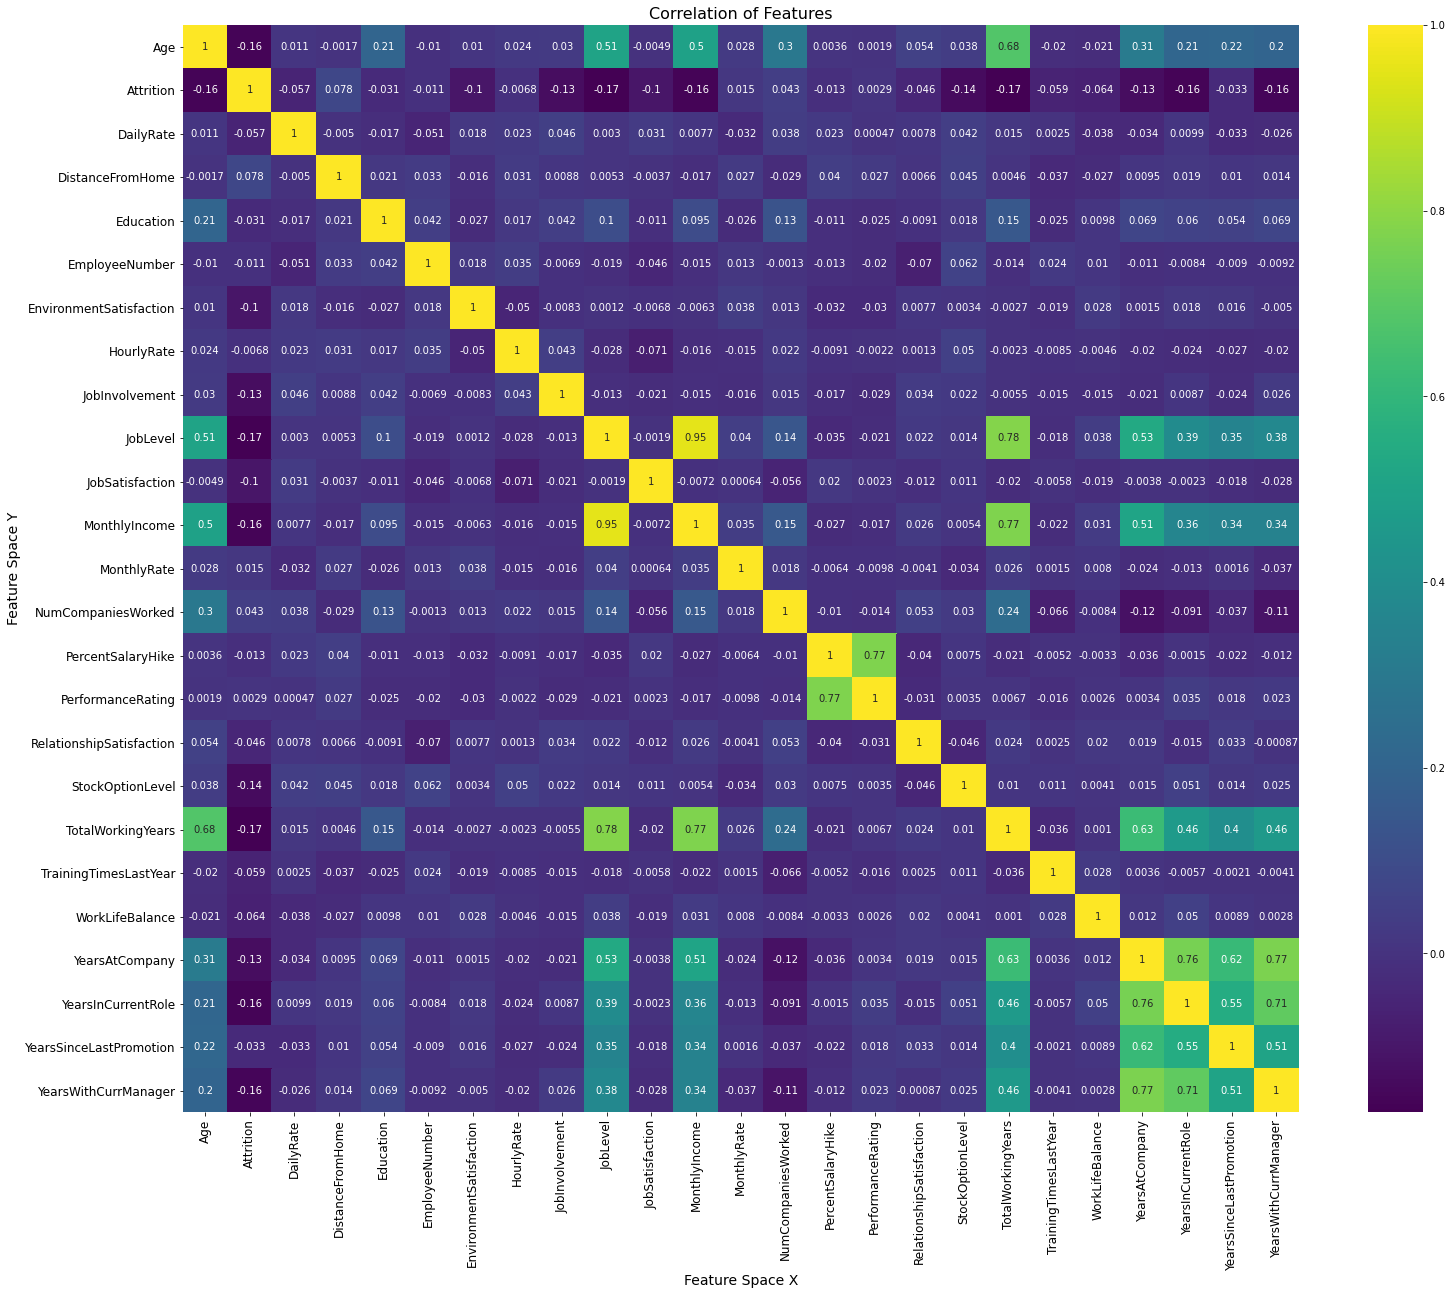

In [201]:
# Plotting the correlation between the numerical features using a heatmap:
figure = plt.figure(figsize=[25, 20])
sns.heatmap(data=numeric_features_modified.corr(), annot=True, cmap='viridis') #, cbar=False
plt.xticks(size=12, rotation=90)
plt.yticks(size=12)
plt.xlabel(xlabel='Feature Space X', size=14)
plt.ylabel(ylabel='Feature Space Y', size=14)
plt.title(label='Correlation of Features', size=16)

### 2. Model building:

a. Split the data into test and train with 80% train size and random state 0

b. Apply decision tree

c. prune the tree and get the best hyper parameters

d. Obtain the Confusion matrix, Accuracy, F1 score and ROC-AUC and plot the ROC curve

e. For this scenario get the best threshold and get the Accuracy, F1 score and AUC values

In [202]:
data_encoded.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1,1102,1,2,1,1,2,94,3,...,0,0,1,0,0,0,1,1,0,1
1,49,0,279,8,1,1,2,3,61,2,...,0,1,0,0,0,1,0,1,1,0
2,37,1,1373,2,2,1,4,4,92,2,...,0,0,0,0,0,0,1,1,0,1
3,33,0,1392,3,4,1,5,4,56,3,...,0,1,0,0,0,1,0,1,0,1
4,27,0,591,2,1,1,7,1,40,3,...,0,0,0,0,0,1,0,1,1,0


In [203]:
# Seperating features & target cols:
X=data_encoded.drop('Attrition',axis=1).copy()  #feature
y=data_encoded[['Attrition']]  # target

In [204]:
# Dropping the 'StandardHours' & 'EmployeeCount' cols(Because of correlation factor):
X.drop(['StandardHours','EmployeeCount'],axis=1,inplace=True)
X.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1102,1,2,1,2,94,3,2,4,...,0,0,1,0,0,0,1,1,0,1
1,49,279,8,1,2,3,61,2,2,2,...,0,1,0,0,0,1,0,1,1,0
2,37,1373,2,2,4,4,92,2,1,3,...,0,0,0,0,0,0,1,1,0,1
3,33,1392,3,4,5,4,56,3,1,3,...,0,1,0,0,0,1,0,1,0,1
4,27,591,2,1,7,1,40,3,1,2,...,0,0,0,0,0,1,0,1,1,0


In [205]:
y.head()

,Attrition
0,1
1,0
2,1
3,0
4,0


In [206]:
X.shape,y.shape

((1470, 53), (1470, 1))

In [207]:
# Importing the train test split method from scikit learn module:
from sklearn.model_selection import train_test_split

In [208]:
# Splitting features & target col in test train data:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0,stratify=y)

In [209]:
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

X_train shape:  (1176, 53)
y_train shape:  (1176, 1)

X_test shape:  (294, 53)
y_test shape:  (294, 1)


In [210]:
# Since this is a classification problem, Decision tree classifier will be used:
from sklearn.tree import DecisionTreeClassifier

In [211]:
# Creating instance of the Classifier:
dsc=DecisionTreeClassifier(max_depth=3,random_state=0)

In [212]:
# training the model:
dsc.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [213]:
pd.Series(dsc.feature_importances_,index=X.columns).sort_values(ascending=False)

MonthlyIncome                        0.308070
OverTime_Yes                         0.292117
MaritalStatus_Single                 0.127854
TotalWorkingYears                    0.102229
YearsInCurrentRole                   0.066492
HourlyRate                           0.066293
WorkLifeBalance                      0.036946
JobRole_Human Resources              0.000000
EducationField_Life Sciences         0.000000
EducationField_Marketing             0.000000
EducationField_Medical               0.000000
EducationField_Other                 0.000000
EducationField_Technical Degree      0.000000
Gender_Female                        0.000000
Gender_Male                          0.000000
JobRole_Healthcare Representative    0.000000
JobRole_Manager                      0.000000
JobRole_Laboratory Technician        0.000000
Department_Sales                     0.000000
JobRole_Manufacturing Director       0.000000
JobRole_Research Director            0.000000
JobRole_Research Scientist        

- **From the above onservation we can see that only 7 cols are important in building the decision tree.**

In [214]:
# Prediction:
y_pred=dsc.predict(X_test)

In [215]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [216]:
pd.DataFrame(np.hstack((y_test,y_pred.reshape(-1,1))),columns=['y_test','y_pred']).head(10)

,y_test,y_pred
0,0,0
1,0,0
2,1,0
3,1,0
4,0,0
5,0,0
6,0,0
7,0,0
8,1,0
9,0,0


- **So, from the above observation we can see that there are some misclassification for the class 1**

In [217]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

In [218]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[238,   9],
       [ 41,   6]], dtype=int64)

- **Classification:**

In [219]:
# TN:
cm[0,0]

238

In [220]:
# TP:
cm[1,1]

6

- **Misclassification**

In [221]:
# FP:
cm[0,1]

9

In [222]:
# FN:
cm[1,0]

41

- For this model, **FN** should not be high. **FP** can be high. Will try to reduce the FN.

In [223]:
# Measuring the performance of the model:
from sklearn.metrics import accuracy_score,f1_score

In [224]:
# Accurancy of the model:
accuracy_score(y_test,y_pred)

0.8299319727891157

In [225]:
f1_score(y_test,y_pred)   # the f1_score is not good for this model. It depends on the recall & precision of the model. 

0.1935483870967742

In [226]:
# Finding the probability of the tree formed by the model based on the test data:
prob=dsc.predict_proba(X_test)
prob

array([[0.93042292, 0.06957708],
       [0.86082474, 0.13917526],
       [0.86082474, 0.13917526],
       [0.57142857, 0.42857143],
       [0.93042292, 0.06957708],
       [0.72972973, 0.27027027],
       [0.57142857, 0.42857143],
       [0.93042292, 0.06957708],
       [0.86082474, 0.13917526],
       [0.93042292, 0.06957708],
       [0.825     , 0.175     ],
       [0.93042292, 0.06957708],
       [0.93042292, 0.06957708],
       [0.93042292, 0.06957708],
       [0.42307692, 0.57692308],
       [0.93042292, 0.06957708],
       [0.93042292, 0.06957708],
       [0.93042292, 0.06957708],
       [0.93042292, 0.06957708],
       [0.93042292, 0.06957708],
       [0.93042292, 0.06957708],
       [0.93042292, 0.06957708],
       [0.93042292, 0.06957708],
       [0.93042292, 0.06957708],
       [0.93042292, 0.06957708],
       [0.93042292, 0.06957708],
       [0.86082474, 0.13917526],
       [0.72972973, 0.27027027],
       [0.86082474, 0.13917526],
       [0.93042292, 0.06957708],
       [0.

In [227]:
# Filtering the positive probability for threshold prediction:
prob_pos=prob[:,1]
prob_pos

array([0.06957708, 0.13917526, 0.13917526, 0.42857143, 0.06957708,
       0.27027027, 0.42857143, 0.06957708, 0.13917526, 0.06957708,
       0.175     , 0.06957708, 0.06957708, 0.06957708, 0.57692308,
       0.06957708, 0.06957708, 0.06957708, 0.06957708, 0.06957708,
       0.06957708, 0.06957708, 0.06957708, 0.06957708, 0.06957708,
       0.06957708, 0.13917526, 0.27027027, 0.13917526, 0.06957708,
       0.80392157, 0.06957708, 0.175     , 0.13917526, 0.06957708,
       0.06957708, 0.13917526, 0.06957708, 0.06957708, 0.06957708,
       0.06957708, 0.06957708, 0.06957708, 0.175     , 0.80392157,
       0.06957708, 0.57692308, 0.06957708, 0.06957708, 0.06957708,
       0.06957708, 0.57692308, 0.06957708, 0.13917526, 0.06957708,
       0.13917526, 0.06957708, 0.13917526, 0.06957708, 0.27272727,
       0.06957708, 0.06957708, 0.06957708, 0.06957708, 0.06957708,
       0.06957708, 0.06957708, 0.06957708, 0.06957708, 0.13917526,
       0.57692308, 0.06957708, 0.06957708, 0.06957708, 0.13917

In [228]:
from sklearn.metrics import roc_curve,auc

In [229]:
fpr,tpr,threshold=roc_curve(y_test,prob_pos)

In [230]:
pd.DataFrame(np.hstack((threshold.reshape(-1,1),fpr.reshape(-1,1),tpr.reshape(-1,1))),columns=['threshold','fpr','tpr'])

,threshold,fpr,tpr
0,1.803922,0.000000,0.000000
1,0.803922,0.012146,0.063830
2,0.576923,0.036437,0.127660
3,0.428571,0.085020,0.234043
4,0.272727,0.085020,0.255319
5,0.270270,0.137652,0.319149
6,0.175000,0.174089,0.404255
7,0.139175,0.340081,0.638298
8,0.069577,1.000000,1.000000


In [231]:
# Area Under the curve (auc score) :
roc_auc=auc(fpr,tpr)
roc_auc

0.6668963735033164

In [232]:
# function to plot the ROC Curve:
def plot_ROC(roc,fpr,tpr):
    plt.title("receiver Operating Charecteristc")
    plt.plot(fpr,tpr,'red',label = 'AUC=%0.2f'% roc)
    plt.legend(loc = 'lower right')
    plt.plot([0,1],[0,1], color = 'darkblue',linestyle='--')
    plt.ylabel('True positive Rate')
    plt.xlabel('False positive Rate')
    plt.show()

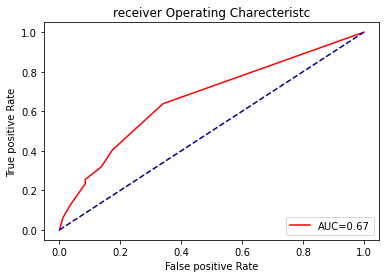

In [233]:
plot_ROC(roc_auc,fpr,tpr)

In [234]:
# trying to predict with different thresholds and improve the model based on the threshold:
new_pred = (prob_pos>0.139175).astype("int")  
new_pred

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1])

In [235]:
confusion_matrix(y_test,new_pred)

array([[163,  84],
       [ 17,  30]], dtype=int64)

- Threshold value of **0.139175** looks good from the above confusion matrix as it reduces the **FN** significantly.

### Hyperparameter tuning:

In [236]:
from sklearn.model_selection import GridSearchCV

In [237]:
# To find out which will be the best possiblity for maximum tree depth & gini/entropy score:

dsc = DecisionTreeClassifier(random_state=0)
params = {'max_depth':list(range(1,21)), 'criterion':['gini', 'entropy']}   # 'max_depth' it can be taken any range.
cv_model = GridSearchCV(dsc, param_grid = params)
cv_model.fit(X_train,y_train)
print(cv_model.best_params_)

{'criterion': 'gini', 'max_depth': 2}


In [238]:
# Now as per the above suggestion, again will train & test the model:
dsc_tree = DecisionTreeClassifier(max_depth=2)
dsc_tree.fit(X_train, y_train)
y_pred_new = dsc_tree.predict(X_test)

In [239]:
y_pred_new

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [240]:
confusion_matrix(y_test,y_pred_new)

array([[244,   3],
       [ 43,   4]], dtype=int64)

In [241]:
accuracy_score(y_test,y_pred_new)

0.8435374149659864

In [242]:
f1_score(y_test,y_pred_new)

0.14814814814814814

In [243]:
prob_new=dsc_tree.predict_proba(X_test)
prob_new

array([[0.92077922, 0.07922078],
       [0.77338129, 0.22661871],
       [0.77338129, 0.22661871],
       [0.77338129, 0.22661871],
       [0.92077922, 0.07922078],
       [0.92077922, 0.07922078],
       [0.77338129, 0.22661871],
       [0.92077922, 0.07922078],
       [0.77338129, 0.22661871],
       [0.92077922, 0.07922078],
       [0.66666667, 0.33333333],
       [0.92077922, 0.07922078],
       [0.92077922, 0.07922078],
       [0.92077922, 0.07922078],
       [0.66666667, 0.33333333],
       [0.92077922, 0.07922078],
       [0.92077922, 0.07922078],
       [0.92077922, 0.07922078],
       [0.92077922, 0.07922078],
       [0.92077922, 0.07922078],
       [0.92077922, 0.07922078],
       [0.92077922, 0.07922078],
       [0.92077922, 0.07922078],
       [0.92077922, 0.07922078],
       [0.92077922, 0.07922078],
       [0.92077922, 0.07922078],
       [0.77338129, 0.22661871],
       [0.92077922, 0.07922078],
       [0.77338129, 0.22661871],
       [0.92077922, 0.07922078],
       [0.

In [244]:
prob_new_pos=prob_new[:,1]
prob_new_pos

array([0.07922078, 0.22661871, 0.22661871, 0.22661871, 0.07922078,
       0.07922078, 0.22661871, 0.07922078, 0.22661871, 0.07922078,
       0.33333333, 0.07922078, 0.07922078, 0.07922078, 0.33333333,
       0.07922078, 0.07922078, 0.07922078, 0.07922078, 0.07922078,
       0.07922078, 0.07922078, 0.07922078, 0.07922078, 0.07922078,
       0.07922078, 0.22661871, 0.07922078, 0.22661871, 0.07922078,
       0.70967742, 0.07922078, 0.33333333, 0.22661871, 0.07922078,
       0.07922078, 0.22661871, 0.07922078, 0.07922078, 0.07922078,
       0.07922078, 0.07922078, 0.07922078, 0.33333333, 0.70967742,
       0.07922078, 0.33333333, 0.07922078, 0.07922078, 0.07922078,
       0.07922078, 0.33333333, 0.07922078, 0.22661871, 0.07922078,
       0.22661871, 0.07922078, 0.22661871, 0.07922078, 0.70967742,
       0.07922078, 0.07922078, 0.07922078, 0.07922078, 0.07922078,
       0.07922078, 0.07922078, 0.07922078, 0.07922078, 0.22661871,
       0.33333333, 0.07922078, 0.07922078, 0.07922078, 0.22661

In [245]:
fpr_new,tpr_new,threshold_new=roc_curve(y_test,prob_new_pos)

In [246]:
pd.DataFrame(np.hstack((threshold_new.reshape(-1,1),fpr_new.reshape(-1,1),tpr_new.reshape(-1,1))),columns=['threshold','fpr','tpr'])

,threshold,fpr,tpr
0,1.709677,0.000000,0.000000
1,0.709677,0.012146,0.085106
2,0.333333,0.072874,0.234043
3,0.226619,0.287449,0.574468
4,0.079221,1.000000,1.000000


In [247]:
roc_auc_new=auc(fpr_new,tpr_new)
roc_auc_new

0.6578947368421053

- The auc score reduced from the previous value. So, need to check for a different threshold value.

In [248]:
new_pred = (prob_pos>0.079221).astype("int")  
new_pred

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1])

In [249]:
confusion_matrix(y_test,new_pred)

array([[163,  84],
       [ 17,  30]], dtype=int64)

- From the above observation we find that the best threshold value for the model is **0.079221** where the FN value is less. 